## Load in the data
- Actual loading script in `processor.py`
- Didnt include hear because it makes the notebook more messy

In [41]:
import matplotlib.pyplot as plot
import numpy as np

In [9]:
# Python script to do a lot of the data processessing and make this notebook look cleaner
import processor
dataset = processor.load_dataset()
channels = processor.process_by_chanel( dataset )

In [10]:
# Pull out the important info about the trending videos into one table
# Label is the assigned cataglory
# Days to trend is publication date - trending date
dataset.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,label,days_to_trend
0,2017-11-14 00:00:00+00:00,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0.282627
1,2017-11-14 00:00:00+00:00,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,People & Blogs,206.716991
2,2017-11-14 00:00:00+00:00,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,2.374965
3,2017-11-14 00:00:00+00:00,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11 18:08:04+00:00,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,Molly is an god damn amazing human and she cha...,People & Blogs,2.244398
4,2017-11-14 00:00:00+00:00,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11 01:19:33+00:00,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,I found this online dollar store called ShopMi...,People & Blogs,2.944757


In [11]:
# All the channels that were on trending
# Count is number of times trended
# Stats reflect total views, likes, dislikes and comments for each video
# Days to trend is average across all trending videos
channels.head()

,channel,count,views,likes,dislikes,comment_count,days_to_trend,label
0,ESPN,203,105654218,937723,108043,387753,2.132705,Sports
1,The Tonight Show Starring Jimmy Fallon,197,271426383,5981334,187407,403655,3.567450,Comedy
2,TheEllenShow,193,253841999,6035132,193602,344469,2.611557,Entertainment
3,Netflix,193,185818315,4211072,196212,391350,3.216193,Entertainment
4,Vox,193,122633963,3272518,615977,558845,4.479800,News & Politics


## Look at trending date statistics by videos

In [15]:
# Huge disperity between median and mean
# Lets see that with data
days_to_trend_mean = dataset['days_to_trend'].mean()
days_to_trend_median = dataset['days_to_trend'].median()
print('It takes ' + str(days_to_trend_mean)[:5] + ' days to trend on average')
print('Median of only ' + str(days_to_trend_median)[:5] + ' days to trend')

It takes 16.22 days to trend on average
Median of only 4.791 days to trend


Chart showing how many days some videos took to trend in a logarithmic fassion


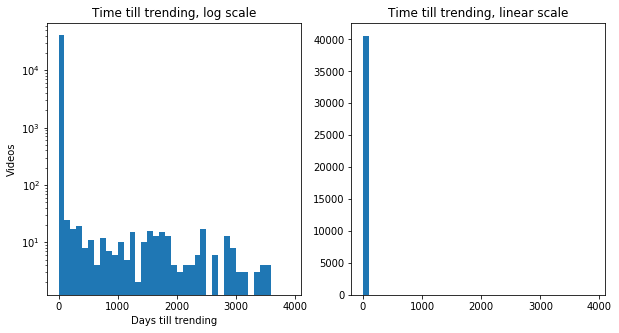

In [46]:
# Looking at it below, wow, some videos take forever to trend? Lets look at that.
fig, a = plot.subplots(1,2,figsize=(10,5))
bins = np.arange( 0,4000, 100)
a[0].hist( dataset['days_to_trend'].tolist(), log=True, bins=bins )
a[0].set_title('Time till trending, log scale')
a[0].set_ylabel('Videos')
a[0].set_xlabel('Days till trending')
a[1].hist( dataset['days_to_trend'].tolist(), log=False, bins=bins )
a[1].set_title('Time till trending, linear scale')
print('Chart showing how many days some videos took to trend in a logarithmic fassion')

In [47]:
# Lets pull one of these videos to make sure
# This video was published in 2006, trended in 2018? Has only a quarter of a million views?
# So you are almost guerenteed to trend immediately or not at all, its very hard for an older video to trend
dataset[dataset['days_to_trend'] > 3000 ][:1]

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,label,days_to_trend
7054,2018-02-05 00:00:00+00:00,Budweiser - Original Whazzup? ad,dannotv,2006-07-23 08:24:11+00:00,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,"Original Whazzup ad - however, there is a litt...",Entertainment,4214.649873


## By metric breakdown

In [56]:
# Lets get some statistics
total_trends = channels['count'].sum()
mean_trending_views = channels['views'].sum() / total_trends
mean_trending_likes = channels['likes'].sum() / total_trends
mean_trending_dislikes = channels['dislikes'].sum() / total_trends
mean_trending_comments = channels['comment_count'].sum() / total_trends
print('A trending video will have on average:')
print(str(mean_trending_views)[:10],'views')
print(str(mean_trending_likes)[:8],'likes')
print(str(mean_trending_dislikes)[:7],'dislikes')
print(str(mean_trending_comments)[:7],'comments')

A trending video will have on average:
2360784.63 views
74266.70 likes
3711.40 dislikes
8446.80 comments


Chart showing How different metrics effect trending rate
X axis is number of times trended, Y axis is value of highlighted metric


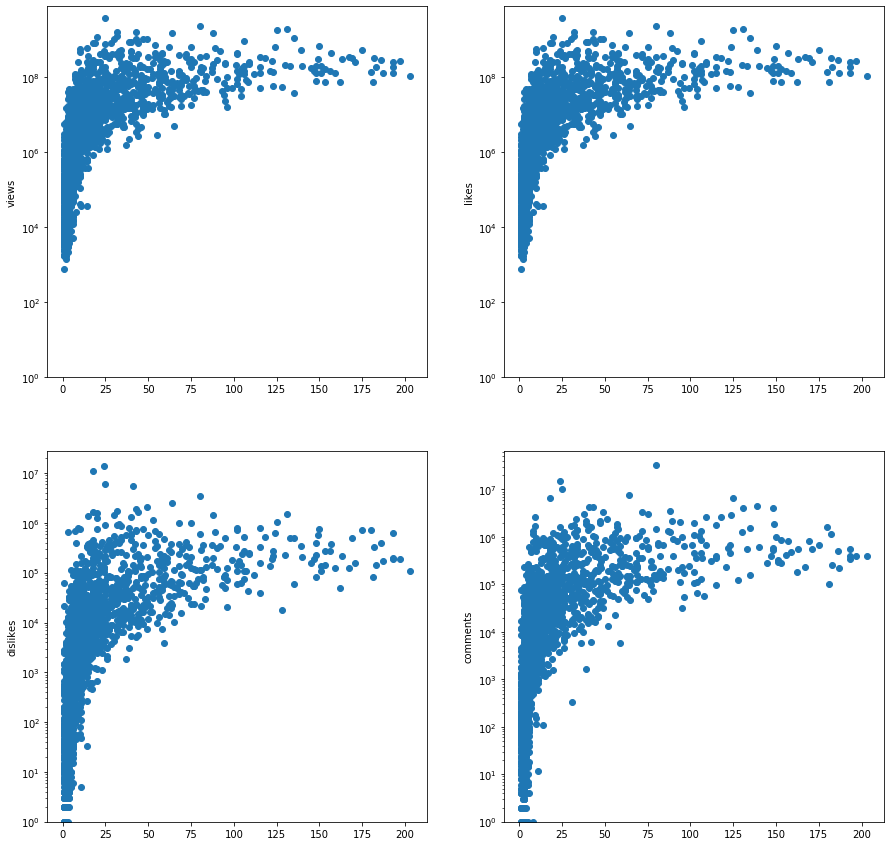

In [74]:
# Lets plot out some statistics as to the breakdown by channel
fig, a = plot.subplots(2,2,figsize=(15,15))
def add_to_plot(dataX, dataY, i, label):
    a[i//2, i%2].scatter(dataX, dataY, label=label)
    a[i//2, i%2].set_ylabel(label)
    a[i//2, i%2].set_yscale('log')
    a[i//2, i%2].set_ylim((1,dataY.max()*2))
add_to_plot( channels['count'], channels['views'],0,'views' )
add_to_plot( channels['count'], channels['views'],1,'likes' )
add_to_plot( channels['count'], channels['dislikes'],2,'dislikes' )
add_to_plot( channels['count'], channels['comment_count'],3,'comments' )
print('Chart showing How different metrics effect trending rate')
print('X axis is number of times trended, Y axis is value of highlighted metric')

In [76]:
# All the charts above look quite similer and seem fairly strongly coorilated
# Notice that there seems to be a hard cutoff on views though, you have to have a certain amount of views to trend.
# Lets look at that in more detail

## By Channel breakdown

High trending channels seem to have nothign to do with views
They have to have a certain cuttof it seems, but after a point it doesnt matter
Interesting to note that these top trending channels dont get more views, infact they get less per video?


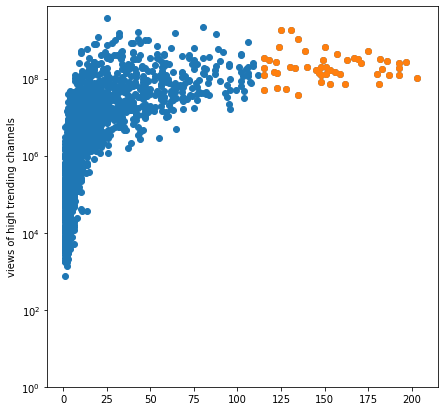

In [89]:
# Lets see if all channels are treated equally here
# Take top 50 channels by views
high_views = channels[:50]
fig, a = plot.subplots(figsize=(7,7))
a.scatter(channels['count'], channels['views'])
a.scatter(high_views['count'], high_views['views'])
a.set_ylabel('views of high trending channels')
a.set_yscale('log')
a.set_ylim((1,channels['views'].max()*2))
print('High trending channels seem to have nothign to do with views')
print('They have to have a certain cuttof it seems, but after a point it doesnt matter')
print('Interesting to note that these top trending channels dont get more views, infact they get less per video?')

In [90]:
# So what does it mean that you can trend over and over but not get many more views than someone who doenst?

## By Category breakdown

messy chart that shows categlory breakdowns by views


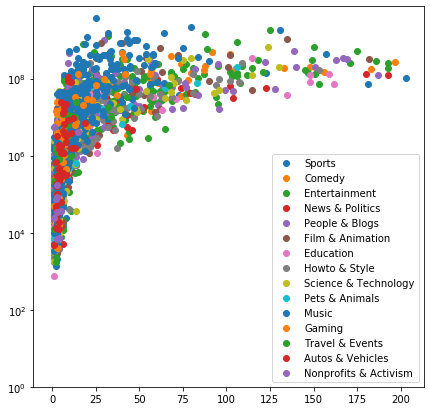

In [102]:
fig, a = plot.subplots(figsize=(7,7))
def chart_views ( label ):
    data = channels[ channels['label'] == label ]
    a.scatter(data['count'], data['views'], label = label)
    a.set_ylim((1,channels['views'].max()*2))
    a.set_yscale('log')
all_cats = channels['label'].unique()
for cat in all_cats:chart_views(cat)
plot.legend()
print('messy chart that shows categlory breakdowns by views')

Red indicates where each cataeglory falls in the overall rankings, clearly some get trend more than others


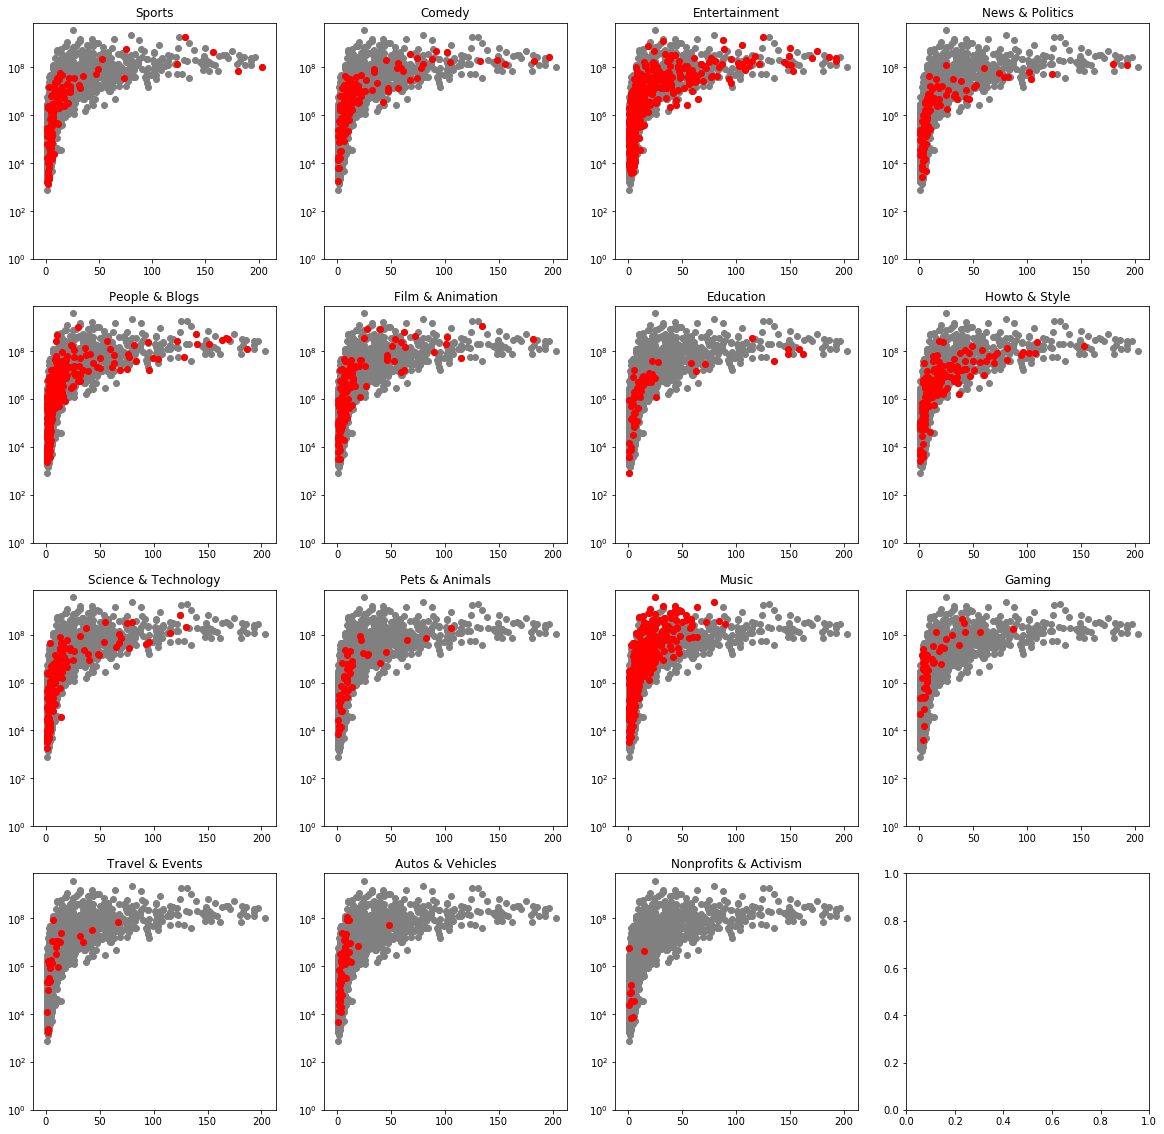

In [107]:
# Lets see this breakdown in more detail
fig, a = plot.subplots(4,4,figsize=(20,20))
def chart_views ( label, i ):
    chart = a[i//4,i%4]
    data = channels[ channels['label'] == label ]
    chart.scatter(channels['count'], channels['views'], c='grey')
    chart.scatter(data['count'], data['views'], label = label,c='red')
    chart.set_ylim((1,channels['views'].max()*2))
    chart.set_yscale('log')
    chart.set_title(label)
all_cats = channels['label'].unique()
for (i,cat) in enumerate(all_cats): chart_views(cat,i)
print('Red indicates where each cataeglory falls in the overall rankings, clearly some get trend more than others')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Purlple indicates average channel with more than 10M views trended


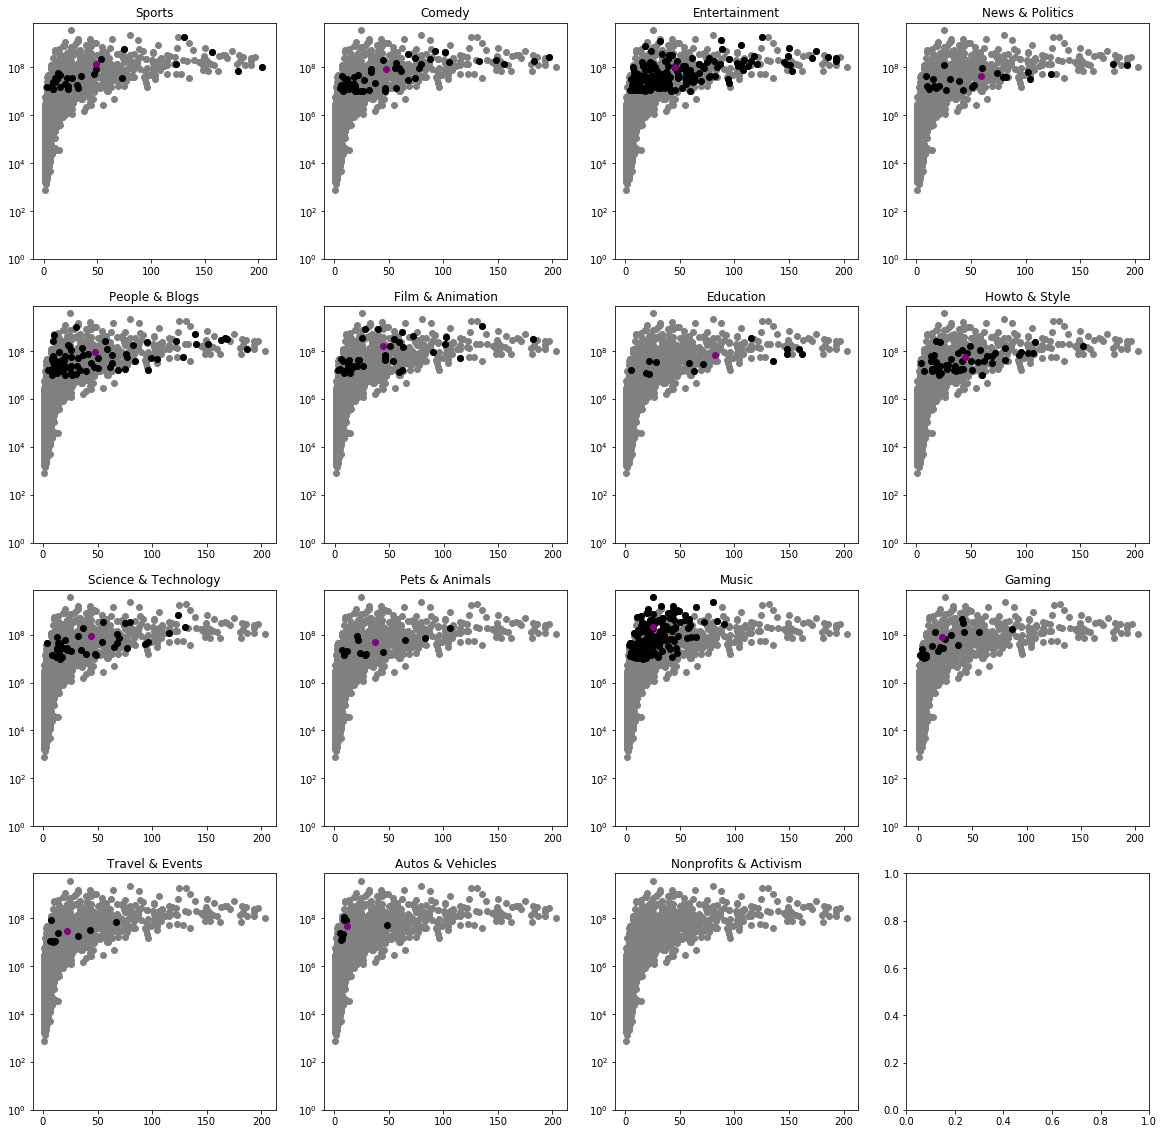

In [113]:
# Cutting off all data after 10^6 views, lets see where the average video channel falls on the trending amount
fig, a = plot.subplots(4,4,figsize=(20,20))
points = []
def chart_views ( label, i ):
    chart = a[i//4,i%4]
    data = channels[ channels['label'] == label][channels['views'] > 10000000 ]
    chart.scatter(channels['count'], channels['views'], c='grey')
    chart.scatter(data['count'], data['views'], label = label,c='black')
    _x = data['count'].mean()
    _y = data['views'].mean()
    chart.scatter([_x],[_y], label = label,c='purple')
    chart.set_ylim((1,channels['views'].max()*2))
    chart.set_yscale('log')
    chart.set_title(label)
    points.append((label,_x,_y))
all_cats = channels['label'].unique()
for (i,cat) in enumerate(all_cats): chart_views(cat,i)
print('Purlple indicates average channel with more than 10M views trended')

No handles with labels found to put in legend.


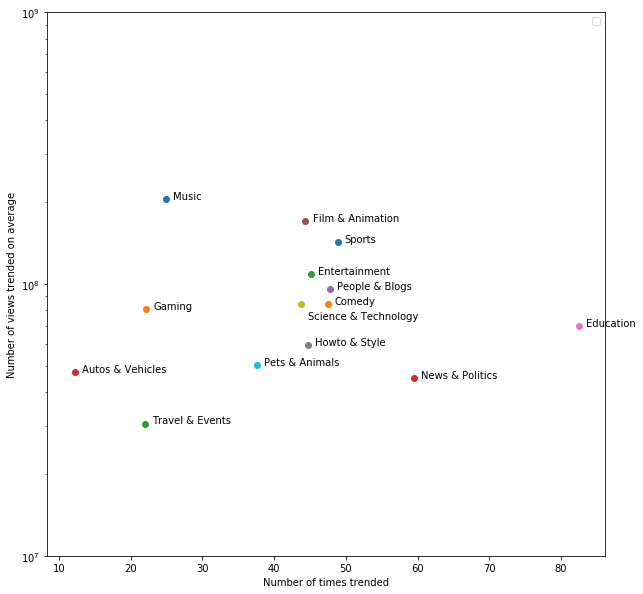

In [129]:
# Lets see how these breakdown
fig, a = plot.subplots(figsize=(10,10))
for (i,x,y) in points:
    a.scatter(x,y)
    if ( i == 'Science & Technology'):
        a.annotate(i,(x + 1,y - 10000000))
    else:
        a.annotate(i,(x + 1,y + 10000))
a.set_ylim((10000000,1000000000))
a.set_yscale('log')
a.set_ylabel('Number of views trended on average')
a.set_xlabel('Number of times trended on anverage per chanel')
plot.legend()

## By Tag Topic breakdown

In [148]:
import re
import collections
import pandas as pd

In [234]:
# First of all, how many tags should you have?
tag_dataset = pd.DataFrame()
tag_dataset['tag_num'] = dataset['tags'].str.split('|').str.len()
tag_dataset['views'] = dataset['views']
tag_dataset[:5]

,tag_num,views
0,1,748374
1,4,98966
2,44,321053
3,12,197062
4,25,2744430


Blue are videos, yellow is rollind average


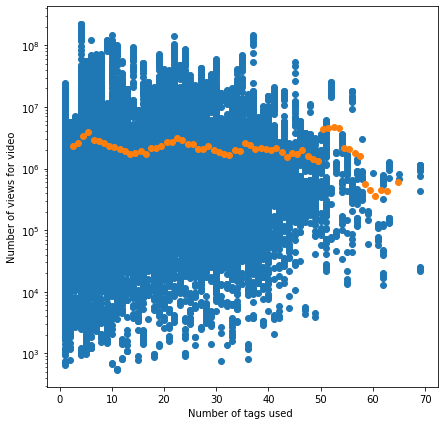

In [252]:
# Lets see how video views relate to tag numbers
fig, a = plot.subplots(figsize=(7,7))
group = tag_dataset.groupby('tag_num').mean().reset_index().rolling(4).mean()
a.scatter(tag_dataset['tag_num'],tag_dataset['views'])
a.scatter(group['tag_num'],group['views'])
a.set_ylabel('Number of views for video')
a.set_xlabel('Number of tags used ')
a.set_yscale('log')
print('Blue are videos, yellow is rollind average')

In [149]:
# What are top videos actually about by tag
pattern = re.compile('[^\|a-zA-Z0-9_]+')
all_tags = '|'.join(dataset['tags']).lower
all_tags = pattern.sub('', all_tags)
all_tags = all_tags.split('|')
print('found ' + str(len(all_tags)) + ' tags')

found 808183 tags


In [209]:
# Lets look at top used tags
counter=collections.Counter(all_tags)
print('Videos trended by tag')
counter.most_common(10)

Videos trended by tag


[('', 8410),
 ('funny', 4142),
 ('comedy', 3647),
 ('howto', 2026),
 ('music', 1667),
 ('pop', 1634),
 ('none', 1537),
 ('makeup', 1504),
 ('trailer', 1413),
 ('2018', 1282)]

In [182]:
# Didnt know how to do this with pandas, so its slow in a double for look ;/
tags_by_video = dataset['tags'].str.split('|').tolist()
views_by_video = dataset['views']
combined = dict () 
for i in range(len(tags_by_video)):
    for tag in tags_by_video[i]:
        t = pattern.sub('', tag).lower()
        if combined.get(t):
            combined[t][0] += views_by_video[i]
            combined[t][1] += 1
        else:
            combined[t] = [views_by_video[i],1]
    if i % 10000 == 0: print(str(i/len(tags_by_video))[:5] + '%')
print('processing. . .')

0.0%
0.244%
0.488%
0.732%
0.976%
processing. . .


In [203]:
# Create a dataframe to show the tags
rows = [ {'tag':a,'views':b,'trends':c} for a,(b,c) in combined.items() ]
tagsData = pd.DataFrame( rows)

In [204]:
tagsData = tagsData.drop([tagsData.index[116]])

In [205]:
# Clearly music tags trend in most views, but not most number of times
tagsData.sort_values(by='views',ascending=False)[:5]

,tag,trends,views
2692,pop,1634,11327075747
3595,rap,382,6609541543
23,funny,4142,6459300503
48,comedy,3647,5759029286
715,musicvideo,753,4919357940


In [206]:
# Comedy is dramaticly more likely to trend again when compaired to musical tags
tagsData.sort_values(by='trends',ascending=False)[:5]

,tag,trends,views
23,funny,4142,6459300503
48,comedy,3647,5759029286
111,howto,2026,3527731838
708,music,1667,2821610384
2692,pop,1634,11327075747


Not sure if this plot is usefull


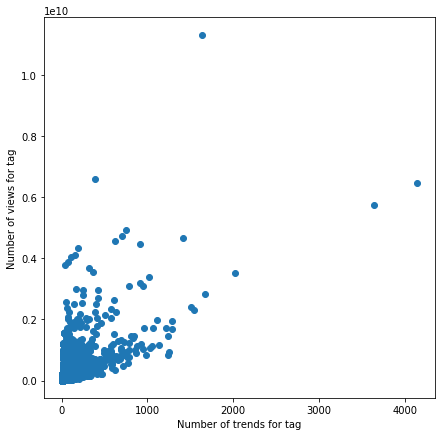

In [228]:
# Try charting this data
fig, a = plot.subplots(figsize=(7,7))
a.scatter(tagsData['trends'], tagsData['views'])
a.set_ylabel('Number of views for tag')
a.set_xlabel('Number of trends for tag')
print('Not sure if this plot is usefull')

## Finaly, I want to see if telling people like a video actually gets more likes?
Just curious about that

In [216]:
like_dataset=pd.DataFrame()
like_dataset['ask_to_like'] = dataset['description'].str.contains("like")
like_dataset['likes'] = dataset['likes']
like_dataset.head()

,ask_to_like,likes
0,True,57527
1,False,2486
2,False,4451
3,True,7250
4,False,115426


In [227]:
# Wow! thats actually fairly decisive
asked_likes = like_dataset[ like_dataset['ask_to_like'] == True]['likes'].mean()
didnt_ask_likes = like_dataset[ like_dataset['ask_to_like'] == False ]['likes'].mean()
print('If asked, mean of ' + str(asked_likes)[:8] )
print('If didnt asked, mean of ' + str(didnt_ask_likes)[:8] )
print('You saw it here, asking people to leave a video a like actually gets you less likes! ')

If asked, mean of 60704.67
If didnt asked, mean of 77105.84
You saw it here, asking people to leave a video a like actually gets you less likes! 


## Conclusions

What requirements are their to get your video trending?
- You seem to need a certain amount of views and engagement 
- It helps to be have your video in a few key cataglories 
- When looking at Frequently Trending Channels:
    - Education, comedy & News channels trend more and with fewer views than anyone else others
    - Music channels will often trend, but only with a high view count, and you shouldnt expect to trend often
    - Gaming chanels are even less likely to trend frequently and need a similarly high number of views
    - News, Comody, and Entertainment channels are amung the most over-represented chanels on the trending list
        - Trending hundreds of times with less views than many music video chanels
- Trending before is a high likelyhood of trending again

How long till you trend?
- Trending will happen withing a few days and sharply falls off after that
- Some select older videos will pop on after a while, but reletively rare
- Trend in the first 3 days or dont trend at all if true in vast majority of cases

What metrics dont matter?
- Dislikes dont seem to effect trending at all
- Views, after about 5 Million, do not have any impact it seems

What helps the video do well?
- Aparently asking for likes is not helpful in getting likes
- Tags by themselves dont seem to indicate much
    - However, you get optimal views with 5ish tags, the more tags the lower the views
    - More than 60 tags and views start to fall fast
    - However, that is relative to other good videos, so += 10 Milion views isnt much in that ranking